<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [ ]:
!pip install tensorflow==2.15.0

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

All the libraries that will be used have been imported

## Loading the dataset

In [ ]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# complete the code to load the dataset

ds = pd.read_csv('/content/drive/MyDrive/Churn.csv')

The data is loaded

## Data Overview

### Viewing the first and last 5 rows of the dataset.

In [ ]:
# let's view the first 5 rows of the data
ds.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Data for the first 5 rows is indicated.

In [ ]:
# let's view the last 5 rows of the data
ds.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

Data for the last 5 rows is indicated

### Understanding the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
ds.shape

(10000, 14)

The data set has 14 columns and 10,000 rows of data

### Checking the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


All the variables contain 10,000 entries of data. The dataset consist of 2 variables that have float datatype, 9 are integeres and 3 are objects.

### Checking the Statistical Summary

In [ ]:
ds.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

The dataset has two variables that are unique and will be removed (RowNumber and CutsomerId). Average credit score is 650.53 with scores ranging between 584 and 718. The average age is 38.92 years with ranges between 32 -44 years. On average, customers have been with the bank for about 5 years. The average account balance is 76,485.89 but there is a high variability with many having 0 balance and a maximum of 250.898. Most customers use 1-2 products with an avarage of 1.53 products. The average estimated salary is 100,090.20 with a typical range between 51,002-149,388 and 2.37% of customers have exited the bank.

### Checking for Missing Values

In [ ]:
# Checking for missing values in the data
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

There are 2 unique variables, RowNumber and CustoomerId all with 10000 entries of data

In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

We therefore drop columns containing the unique variables

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

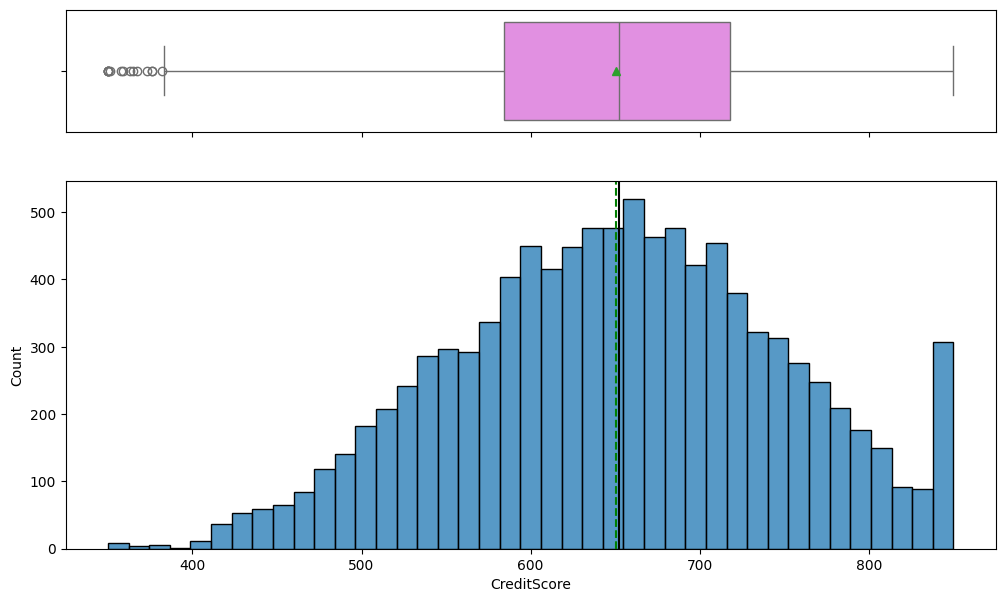

In [ ]:
# Histogram_boxplot for CreditScore
histogram_boxplot(ds,'CreditScore')

The Credit Score data is centered around a median value of 650.
The majority of Credit Scores lie between 580 and 720.
There are some low outliers, but the bulk of the data shows a normal distribution with a slight left skew.
The histogram corroborates the box plot, showing a higher concentration of Credit Scores around the median and a gradual decline towards the extremes.

#### Observations on Age

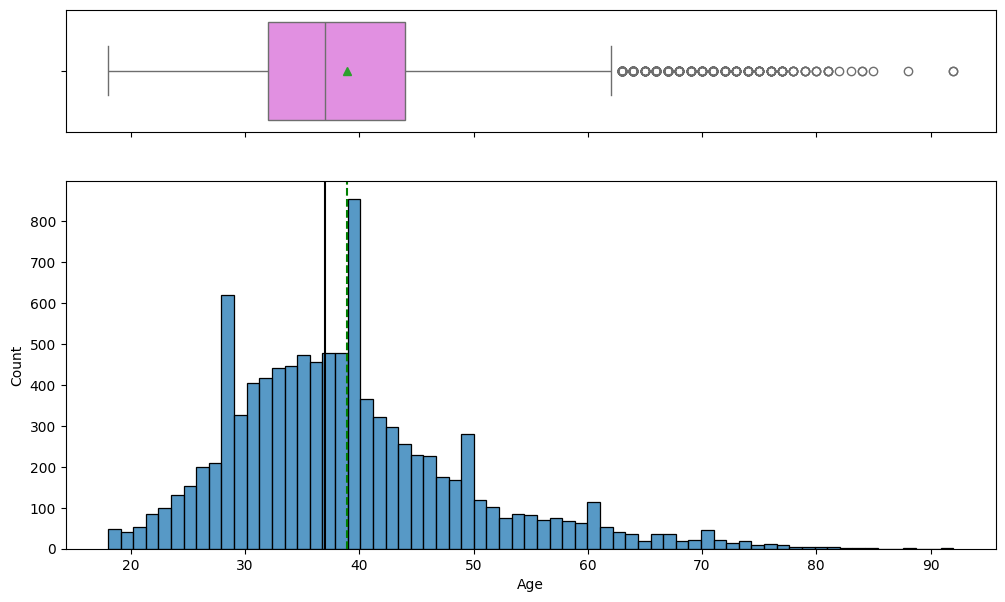

In [ ]:
# histogram_boxplot for Age
histogram_boxplot(ds,'Age')

The age data is centered around a median value of 37.
The majority of ages lie between 32 and 44.
There are several high outliers, particularly above the age of 60.
The histogram indicates a higher concentration of individuals in their 30s and 40s, with fewer younger and older individuals.
The age distribution is slightly right-skewed, indicating more older individuals compared to younger ones.

#### Observations on Balance

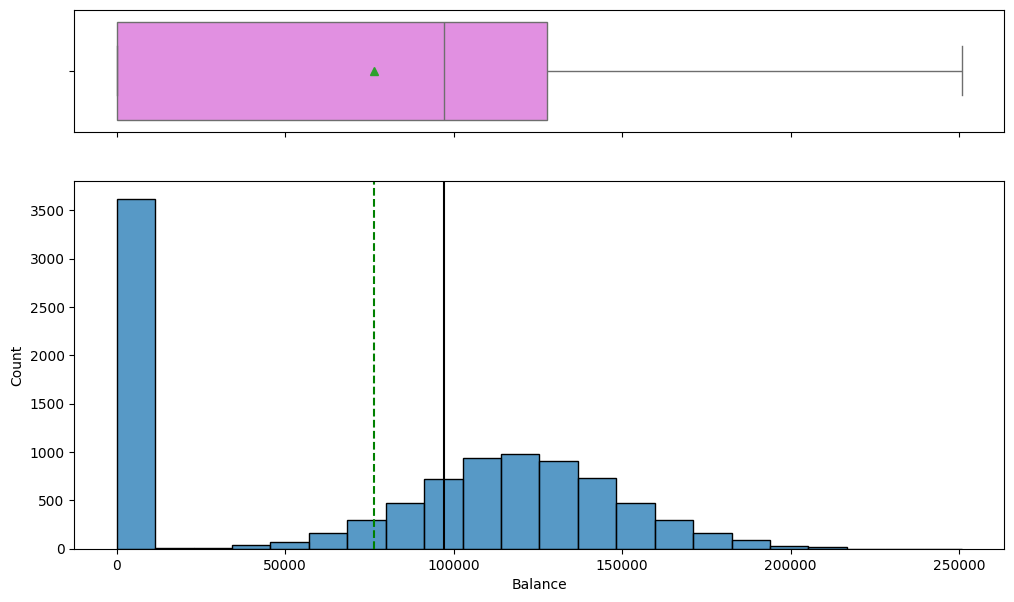

In [ ]:
# histogram_boxplot for Balance
histogram_boxplot(ds, 'Balance')

The balance data is highly skewed to the right, with a significant number of customers having a zero balance.
The median balance is just under 100,000, indicating that half of the customers have balances below this amount.
The interquartile range extends from 0 to just over 125,000, showing that most customers' balances lie within this range.
The histogram indicates that while there are many customers with zero balance, those who do have a balance generally have values concentrated around 100,000.

#### Observations on Estimated Salary

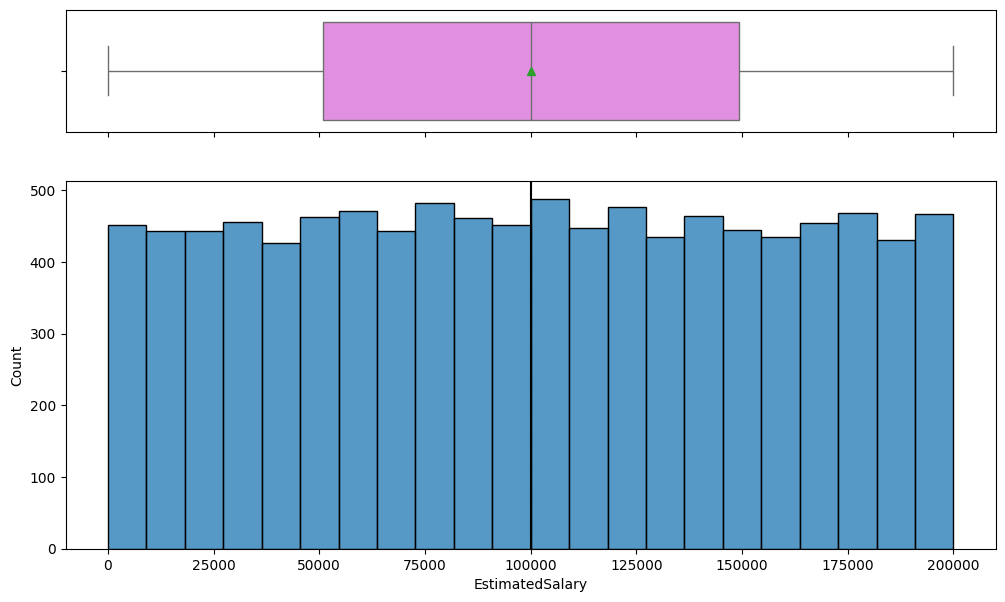

In [ ]:
# histogram_boxplot for Estimated Salary
histogram_boxplot(ds, 'EstimatedSalary')

The estimated salaries appear to be quite variable, with salaries ranging across different levels. The salaries range between 0 to approximately $ 200,000 with a mean and median of 100,000.

#### Observations on Exited

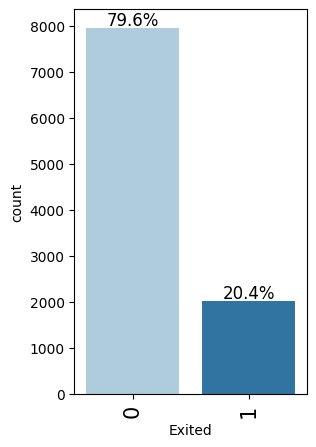

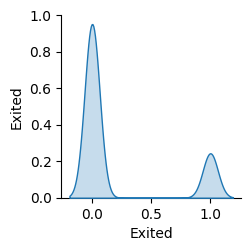

In [ ]:
# Barplot and pairplot for exited status
labeled_barplot(ds, "Exited", perc=True)
sns.pairplot(ds[['Exited']], diag_kind="kde")

20.4% of the bank customers exited while 79.6 did not exit

#### Observations on Geography

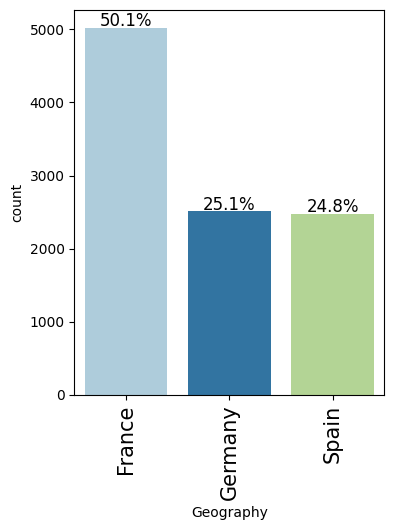

In [ ]:
# Barplot of geography
labeled_barplot(ds, 'Geography', perc=True)

The data indicates the geographical location of the bank customers. Most of the customers were from France (50.1%) while Germany (25.1%) and Spain ahd the least number of customers (24.8%).

#### Observations on Gender

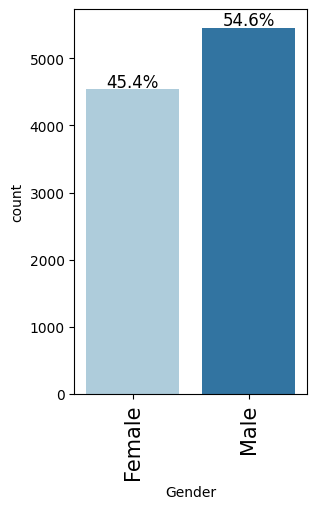

In [ ]:
# Bbarplot for Gender
labeled_barplot(ds, 'Gender', perc=True)

The majority of the customers were male (54.6%) while the female proportion was 45.4%.

#### Observations on Tenure

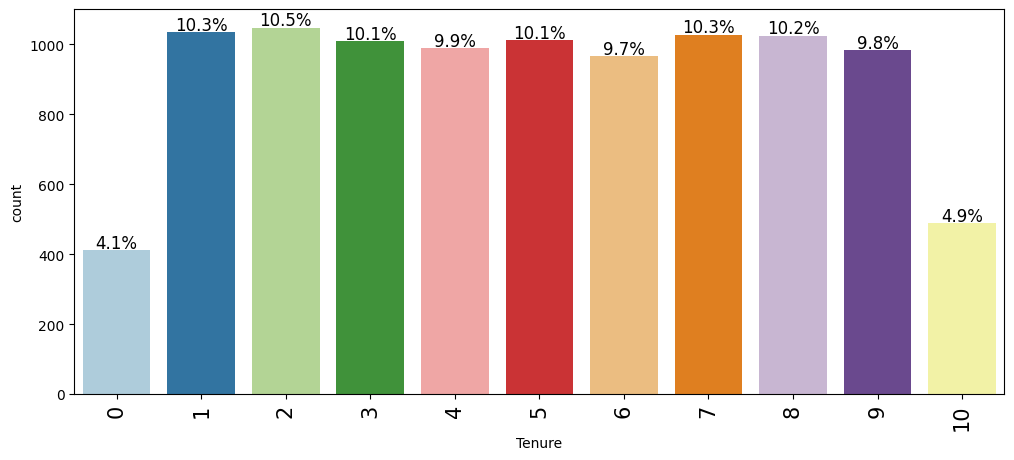

In [ ]:
 ## labeled_barplot for Tenure
 labeled_barplot(ds, 'Tenure', perc=True)

The tenure data exhibited a high variability with customers having tenure ranging from 1-10 years.

#### Observations on Number of Products

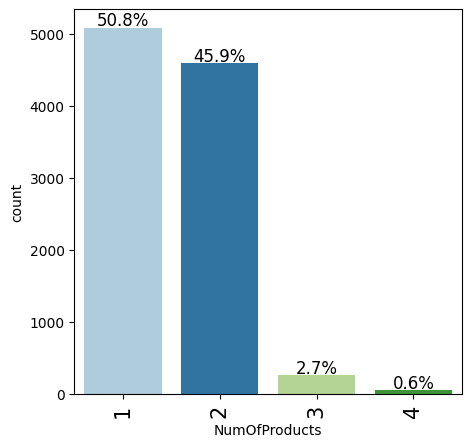

In [ ]:
## labeled_barplot for Number of products
labeled_barplot(ds, 'NumOfProducts', perc=True)

A total of 4 bank products were available. The majority of customers bought 1-2 products.

#### Observations on Has Credit Card

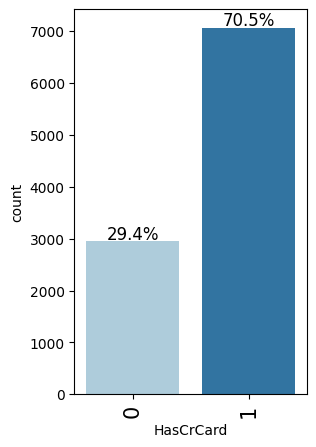

In [ ]:
 ## labeled_barplot for Has credit card
labeled_barplot(ds, 'HasCrCard', perc=True)

The majority of bank customers had credit cards

#### Observations on Is Active Member

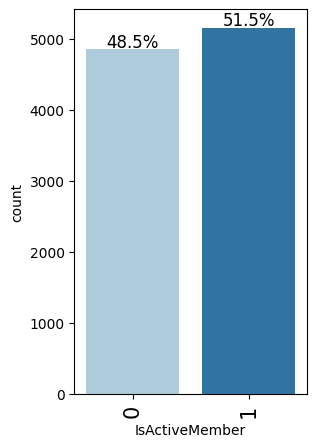

In [ ]:
 ## labeled_barplot for Is active member
 labeled_barplot(ds, 'IsActiveMember', perc=True)

The bank had about 48.5% of customers not being active while 51.5% were active.

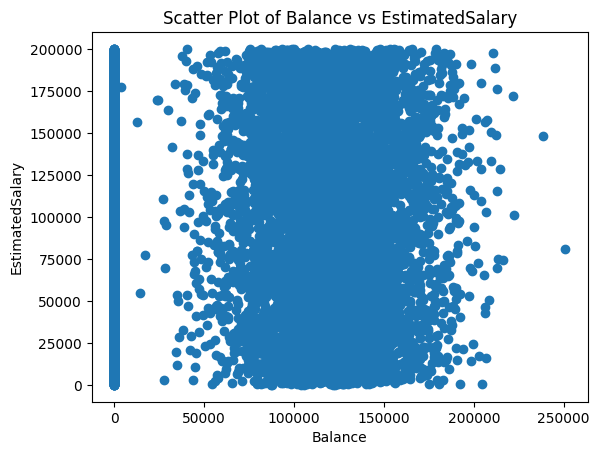

In [ ]:
# Scatter plot between Balance and EstimatedSalary
plt.scatter(ds['Balance'], ds['EstimatedSalary'])
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.title('Scatter Plot of Balance vs EstimatedSalary')
plt.show()

The estimated salary had very high variability with rabges bewteen 0-250,000. A signiicant number of customers had 0 balance. The majority of customers had bank balances of between 1000,000 and 150,000.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

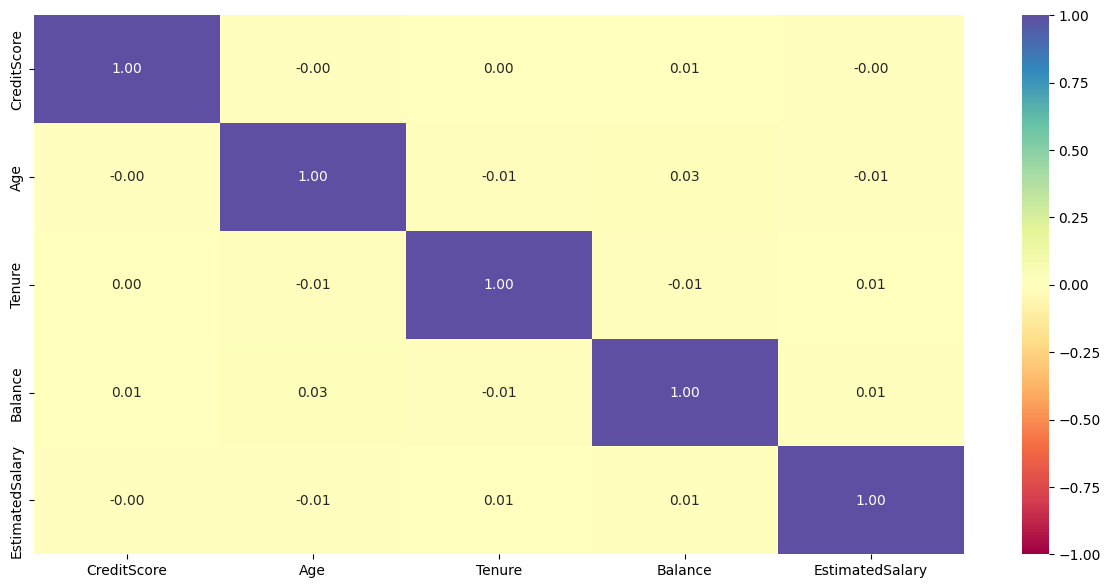

In [ ]:
# Corellation analysis of numerical variables
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is very low corellation between the variables. A few variables have low negative corellation. There doesn’t appear to be a strong linear relationship between an individual’s credit score, age and their estimated salary. There is a low negative correlation between estimated salaries and credit score and age. Balance and tenure have a low negative corellation.

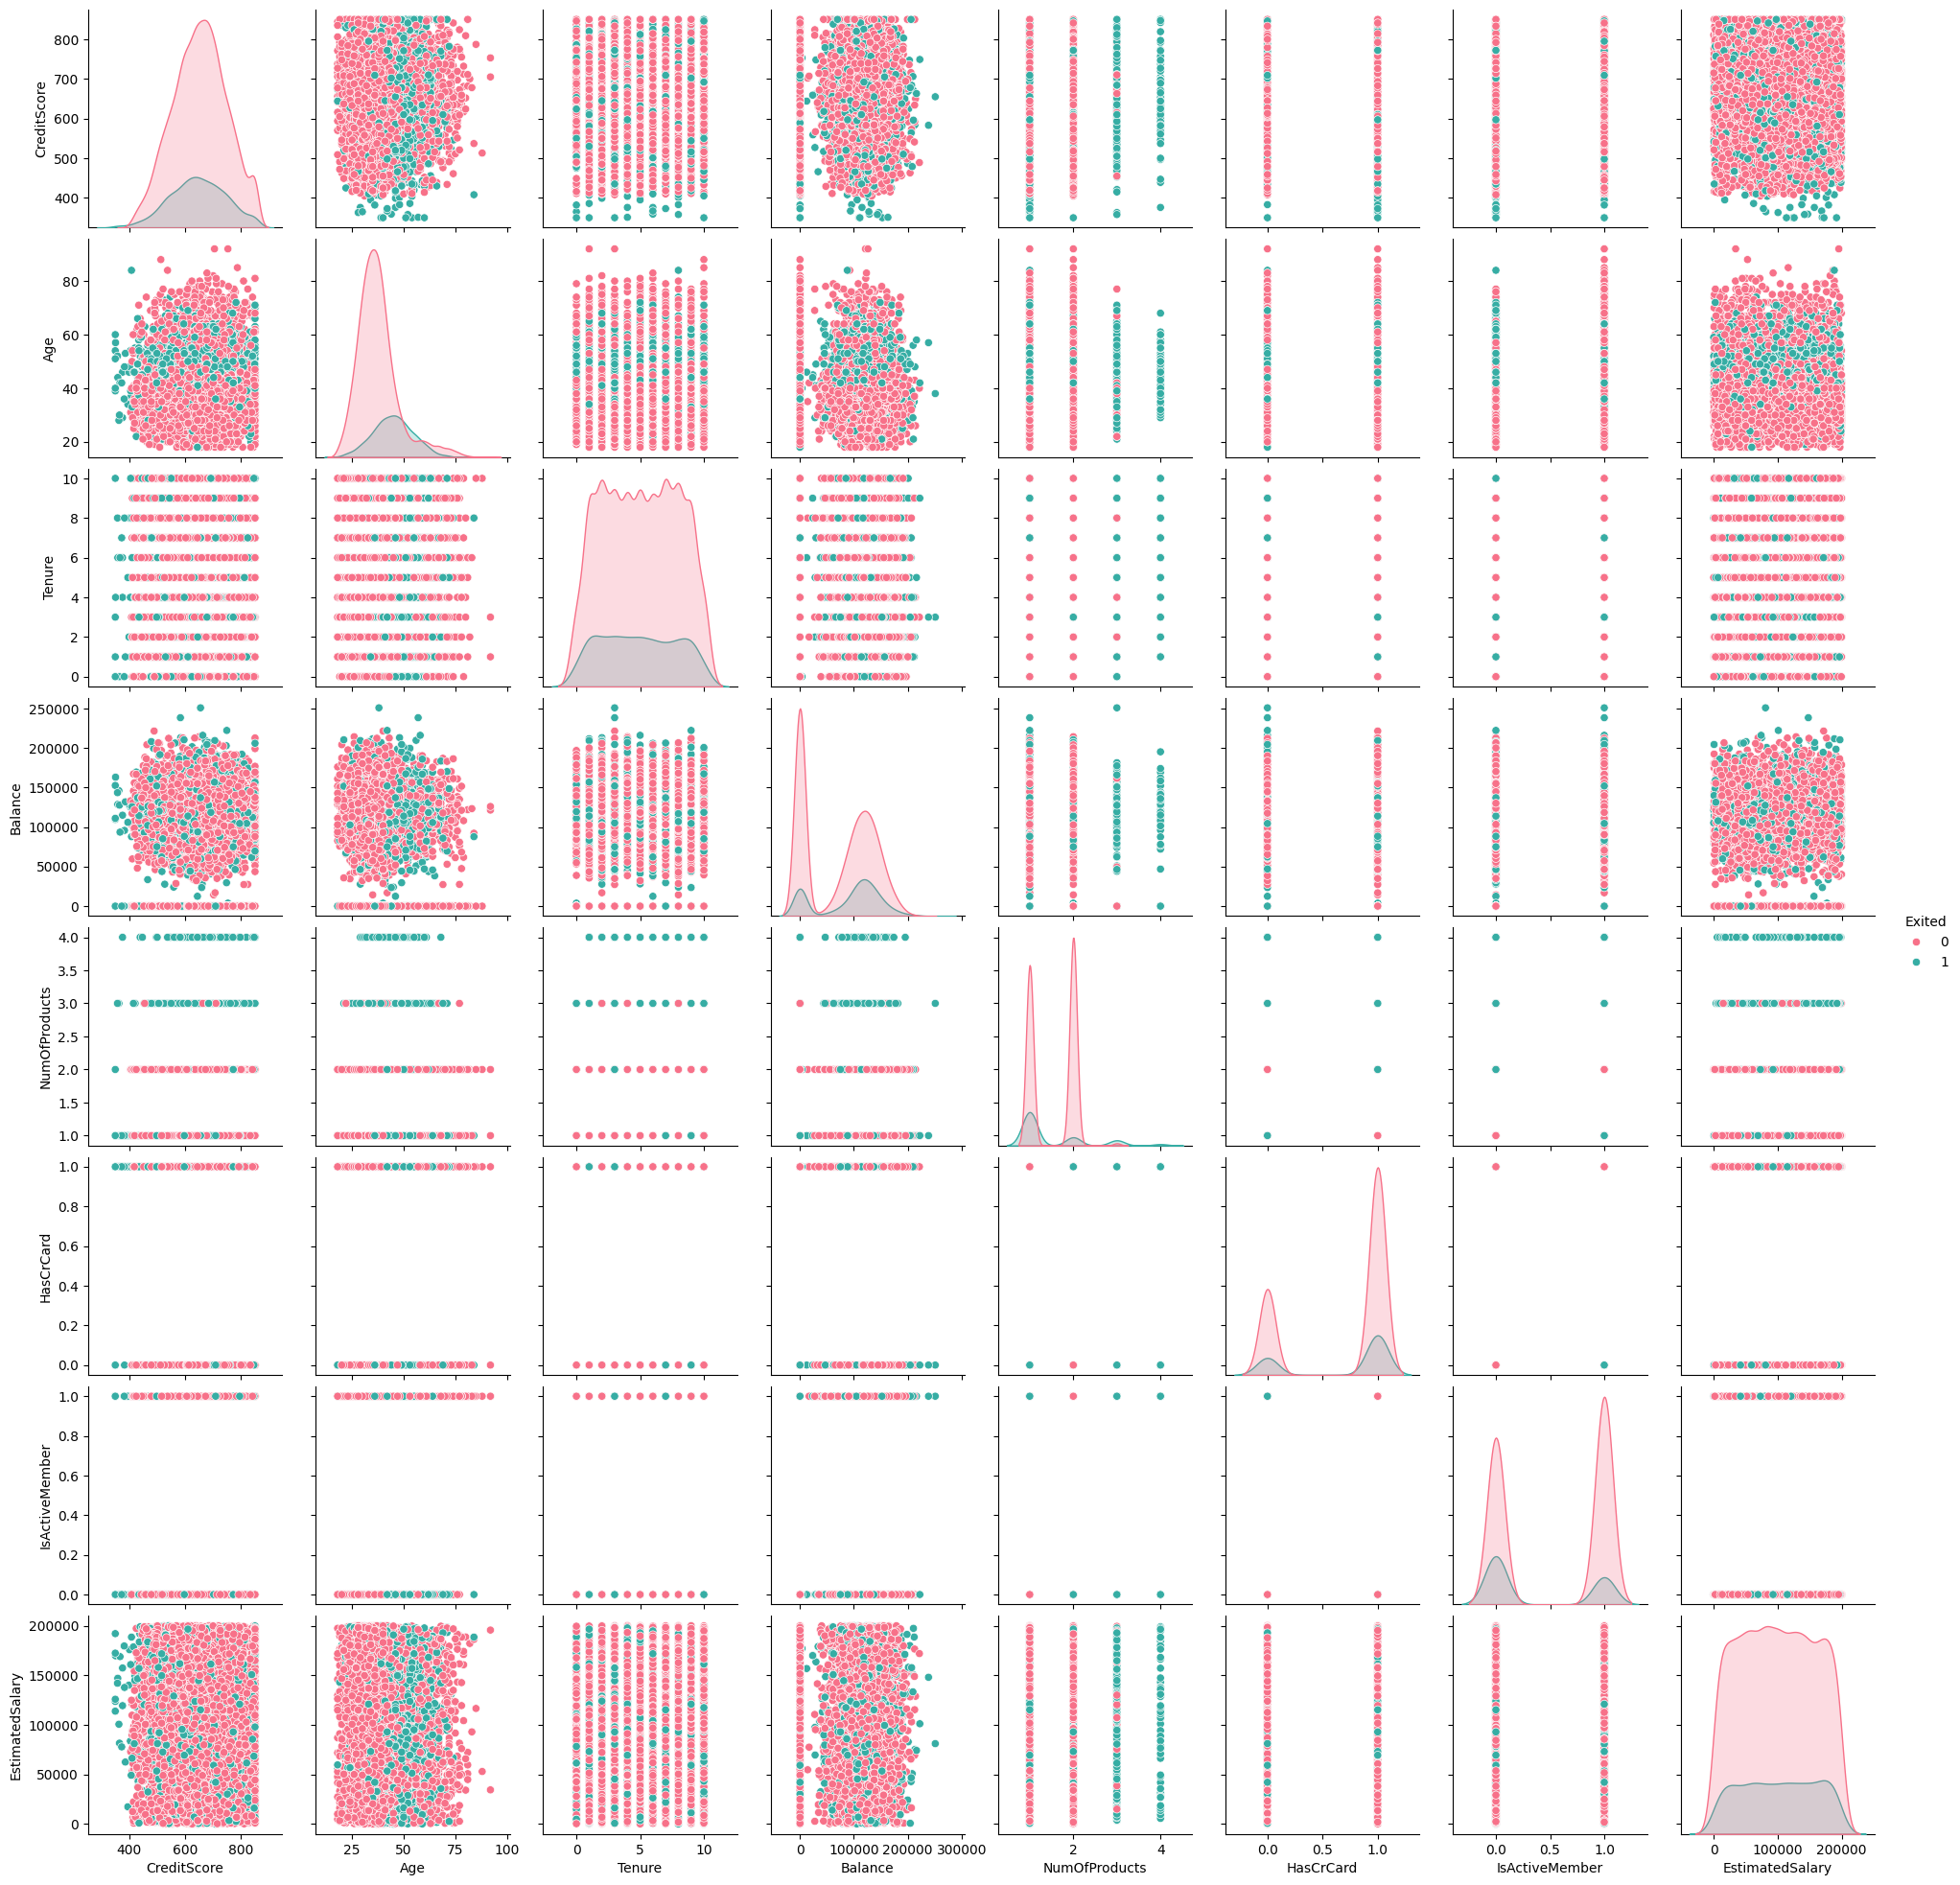

In [ ]:
# Pairplot of variables
sns.pairplot(ds,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=2.5)
plt.show()

The ralationship of variables across the 2 target variables is indicated.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


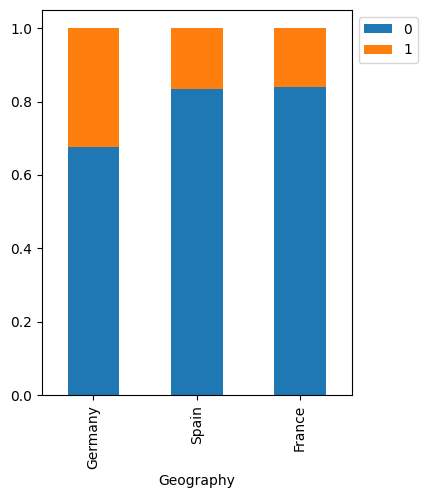

In [ ]:
# Stacked barplt of exited and geography
stacked_barplot(ds, "Geography", "Exited")

Of the customers that exited, the majority were from Germany. The number of the exited customers in spain and France was about the same.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


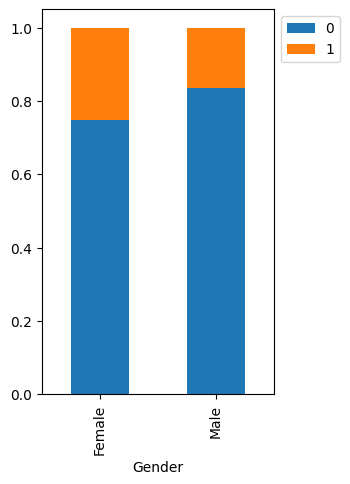

In [ ]:
# Stacked barplt of exited and gender
stacked_barplot(ds, 'Gender', 'Exited')


of the customers that exited, the majority were females

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


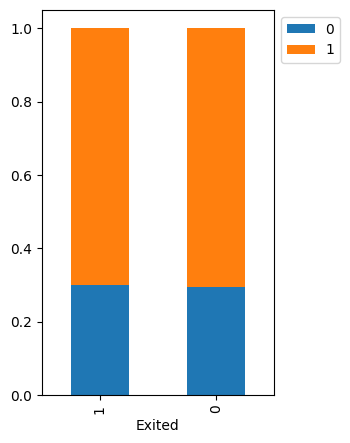

In [ ]:
# Stacked barplot for Exited and Has credit card
stacked_barplot(ds, 'Exited', 'HasCrCard')

The proportion of customers that either had or did not have a credit card for both categories was almost the same. There was no difference.

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


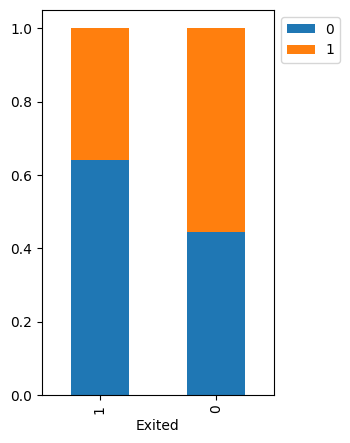

In [ ]:
# stacked barplot for Exited and Is active member
stacked_barplot(ds, 'Exited', 'IsActiveMember')

The majority of the customers that did not exit were active. Most of the customers that exited were inactive with a small proportion being active compared to those that did not exit.

#### Exited Vs Credit Score

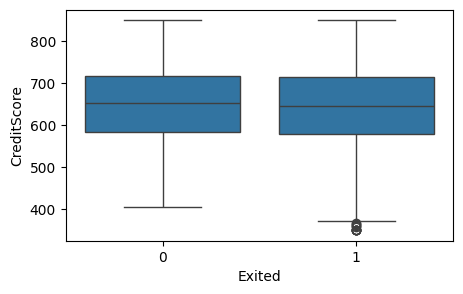

In [ ]:
# Boxplot for credit score and exited
plt.figure(figsize=(5,3))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

The median credit score for the customers that did not exit was slightly higher than those that exited, however, the difference was very small. The credit score data for customers who exited had low value outliers of below $400.

#### Exited Vs Age

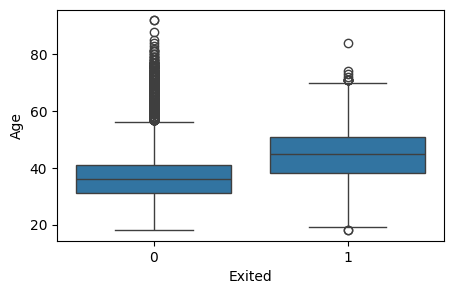

In [ ]:
## Boxplot for Exited and Age
plt.figure(figsize=(5,3))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

The average median age for the customers that exited was higher above 40years old while the customers who did not exit had a median age of below 40 years. Most of the customers who did not exit had very many outlier age of above 60 years compared to those that exited.

#### Exited Vs Tenure

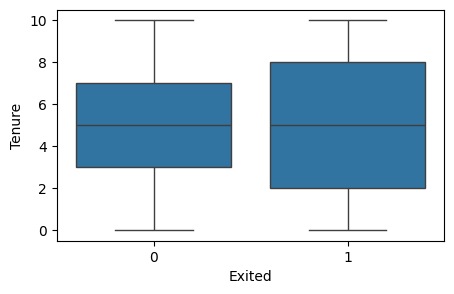

In [ ]:
## boxplot for Exited and Tenur
plt.figure(figsize=(5,3))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

There was no difference in the median tenure dusration for the customers that exited and those that did not exit.

#### Exited Vs Balance

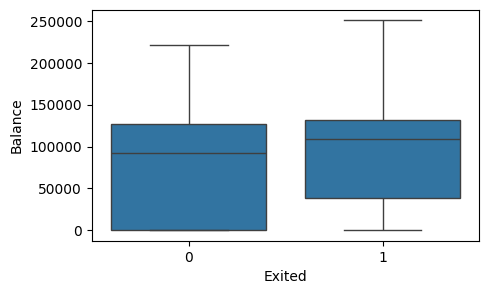

In [ ]:
## boxplot for Exited and Balance
plt.figure(figsize=(5,3))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

The bank median balances for those that exited was higher (above $100,000) than those that did not exit which was below 100,000.

#### Exited Vs Number of Products

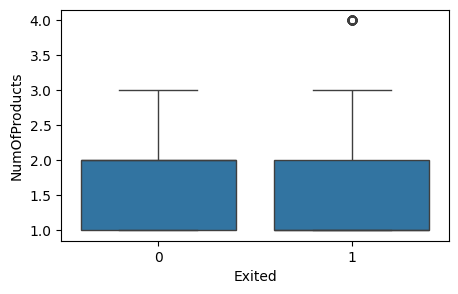

In [ ]:
 ## boxplot for Exited and Number of products
plt.figure(figsize=(5,3))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

There was no difference in the number of bank products purchased by customers who exited and those that did not exit.

#### Exited Vs Estimated Salary

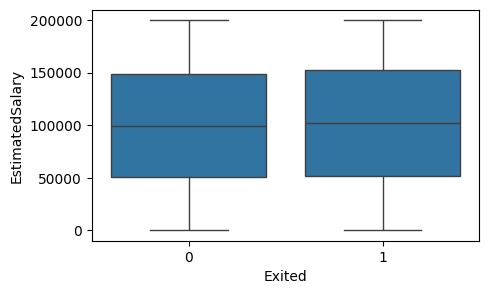

In [ ]:
## boxplot for Exited and Estimated Salary
plt.figure(figsize=(5,3))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

There was no significant difference in the estimated median salary for the bank customers that exited and those that did not exit. Both categories had a median estimated salary of about $100,000.

In [ ]:
# Creating a Balance_Income_Ratio variable in the dtaset
ds['Balance_Income_Ratio'] = ds['Balance'] / ds['EstimatedSalary']
ds.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Balance_Income_Ratio  
0          1               1        101348.88       1              0.000000  
1          0               1        112542.58       0              0.744677  
2          1               0        113931.57       1              1.401375  
3          0               0         93826.63       0              0.000000  
4          1               1         79084.10       0              1.587055

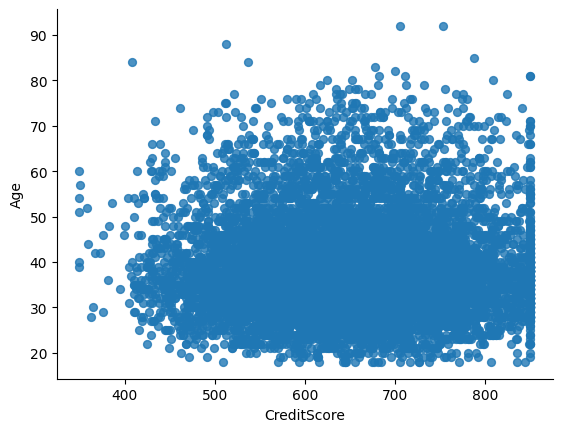

In [ ]:
# Displot of CreditScore vs Age

from matplotlib import pyplot as plt
ds.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

There was no clear relationship betwenn age and credit score

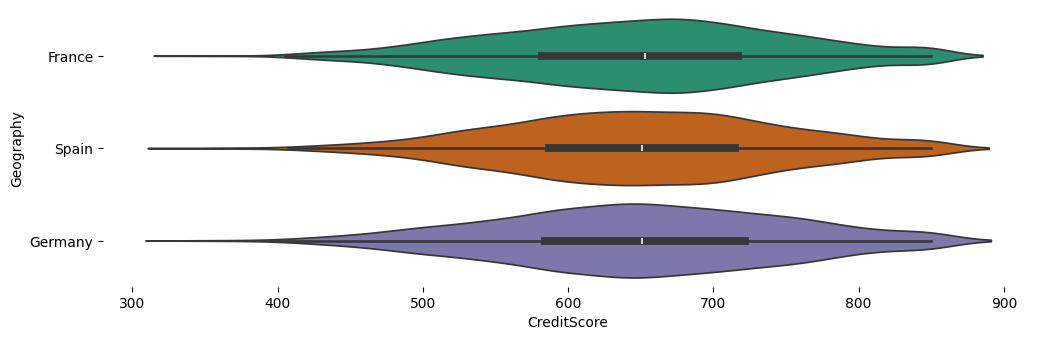

In [ ]:
# Violin plot of Geography vs CreditScore

figsize = (12, 1.2 * len(ds['Geography'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ds, x='CreditScore', y='Geography', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

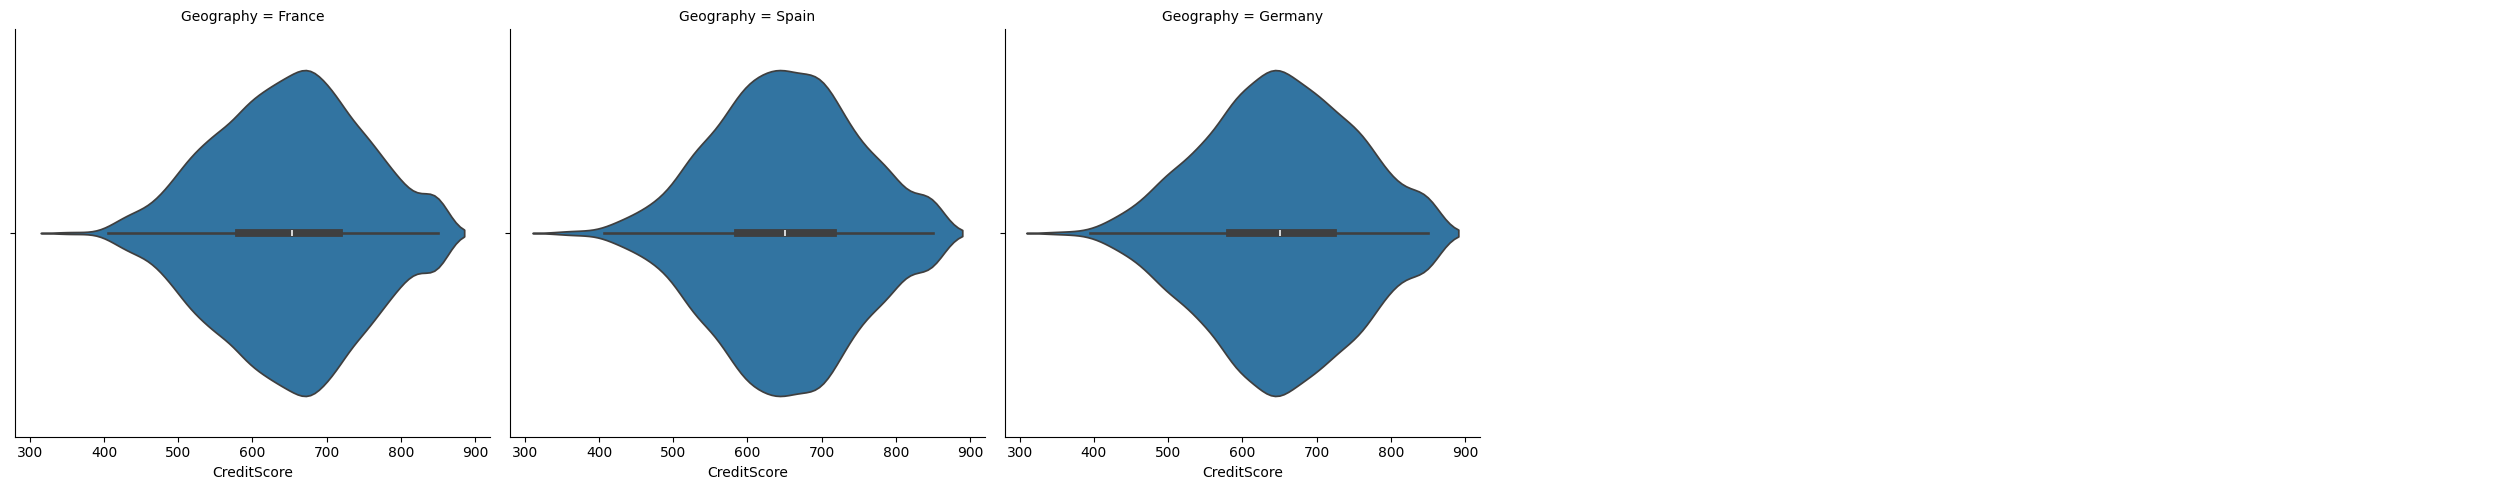

In [ ]:
# Dispersion of credit score and geography
sns.catplot(x='CreditScore',
            col='Geography',
            data=ds,
            col_wrap=5,
            kind="violin")
plt.show()

The median credit score across the three regions was the almost the same

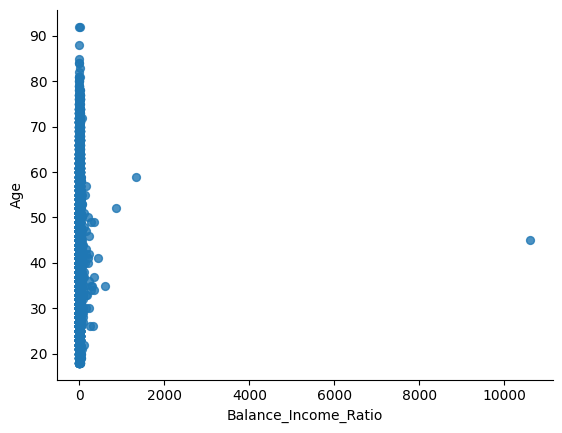

In [ ]:
# Displot of Balance_Income_Ratio vs Age

from matplotlib import pyplot as plt
ds.plot(kind='scatter', x='Balance_Income_Ratio', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The age did not affect the balance income ratio of bank customers

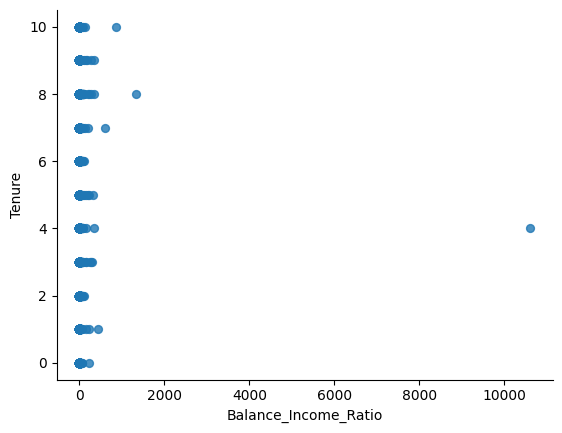

In [ ]:
# Displot of Balance_Income_Ratio vs Age

from matplotlib import pyplot as plt
ds.plot(kind='scatter', x='Balance_Income_Ratio', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The tenure did not affect the balance income ratio of bank customers

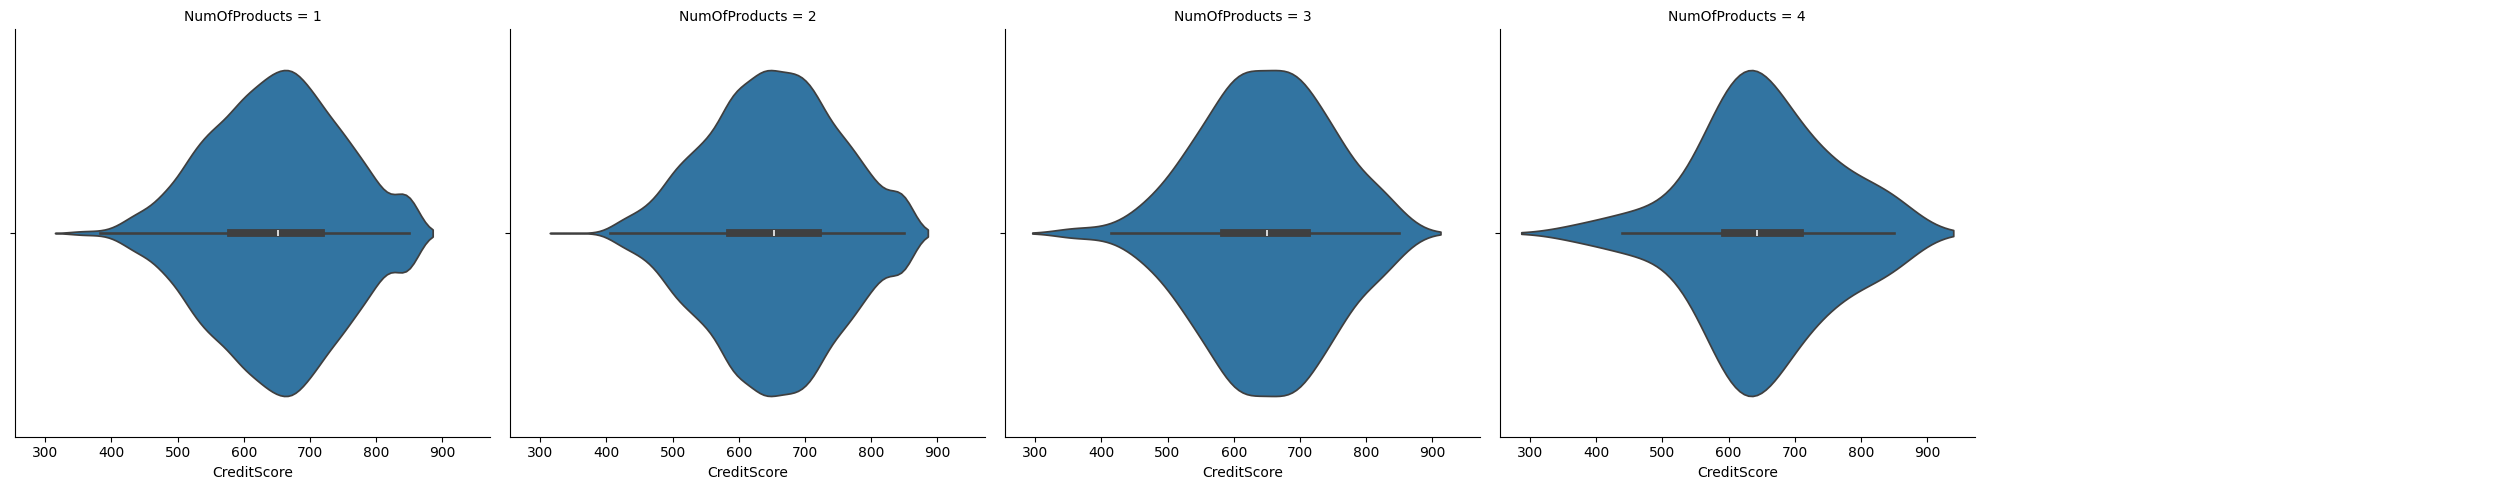

In [ ]:
# Dispersion of credit score and the number of products
sns.catplot(x='CreditScore',
            col='NumOfProducts',
            data=ds,
            col_wrap=5,
            kind="violin")
plt.show()

The dispersion of customer credit score for all the four products varies slightly. For example, customers who purchased product 3 and 4 had a higher credit score range compared to those that purchased products 1 and 2. However, creditScore did not have an influence on the products purchased by the customers as the majority of those that purchased any of the products had a mean median credit score of about $650.

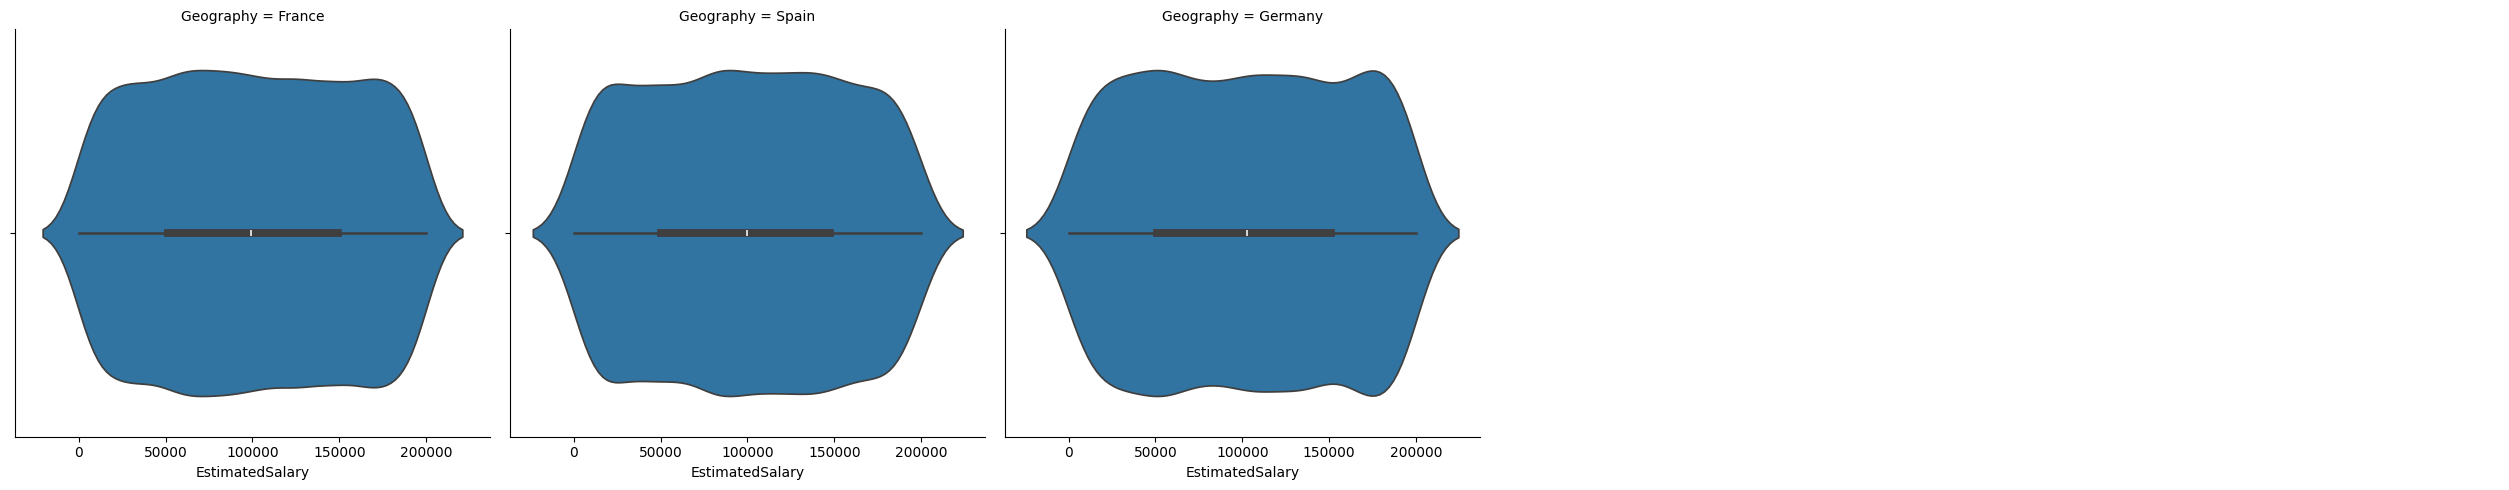

In [ ]:
# Dispersion of ost_of_the_order for every cuisine type
sns.catplot(x='EstimatedSalary',
            col='Geography',
            data=ds,
            col_wrap=5,
            kind="violin")
plt.show()

Geographical location of customers did not have an impact on the estimated salary

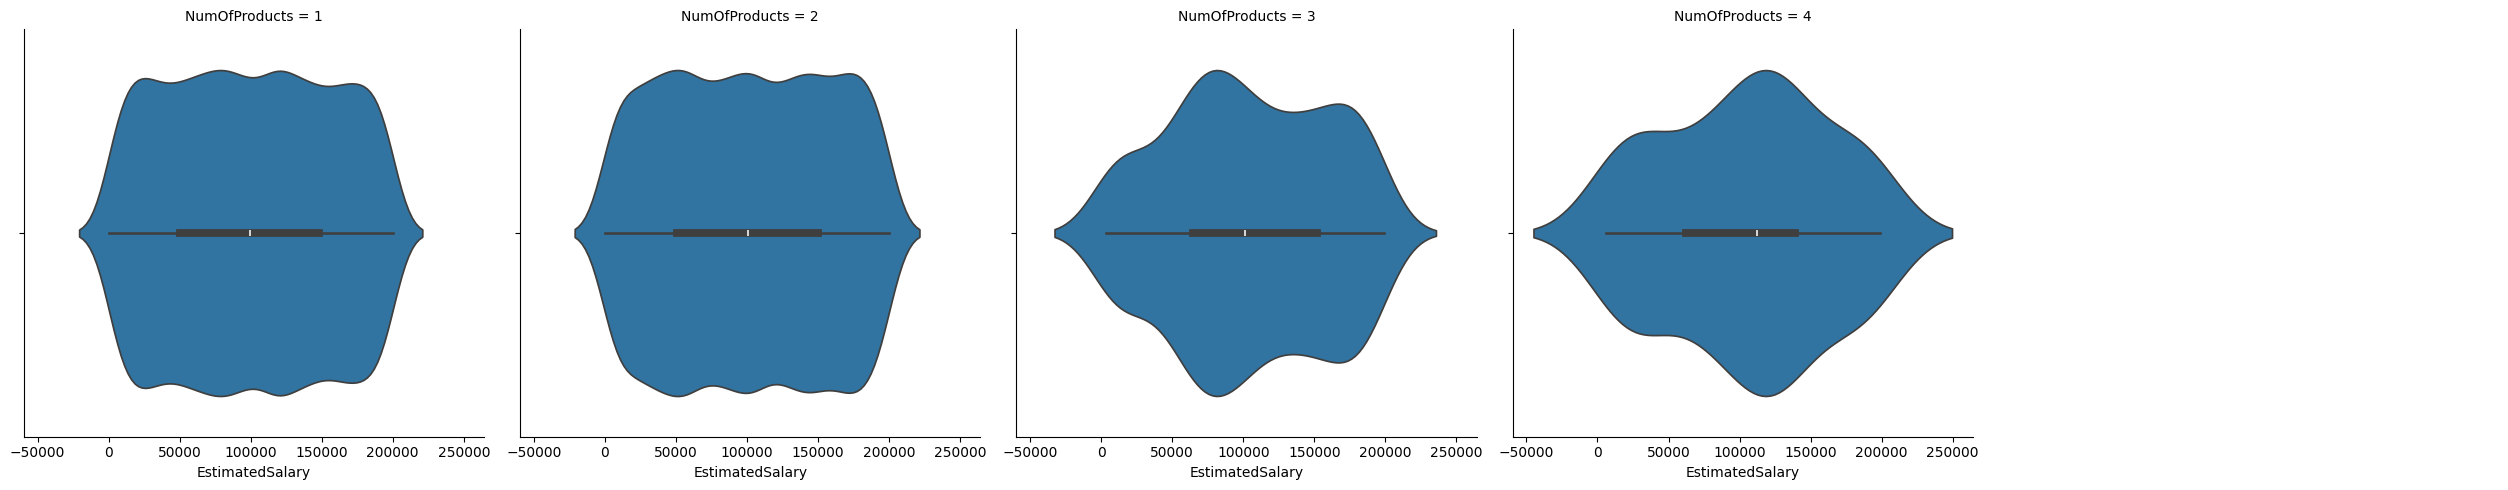

In [ ]:
# Dispersion of estimated salary and number of products
sns.catplot(x='EstimatedSalary',
            col='NumOfProducts',
            data=ds,
            col_wrap=5,
            kind="violin")
plt.show()

The dispersion of estimated salary and number of products varied significantly. While dispersion of product 1 and 2 was almost similar, these were sigificantly different from those of products 3 and 4.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

Dummies for categorical varibales have been created.

### Train-validation-test Split

In [ ]:
# creating dependent and independent variables for training
X = ds.drop(['Exited'],axis=1)
y = ds['Exited']

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


The dataset has been split into x-train, x-test and x-validation sets

In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


All the split data sets have 12 variables. The y-train set has 6400 rows of data, y-val has 1600 and y-test has 2000 rows

### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler to normalize the x_train, x_validation and x_test data sets
sc = StandardScaler()
X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

**Creating a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Creating two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(128, activation='relu'))
# Code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# we can use different metrics, we can select one or more
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

Recall will be used to evaluate performance of the model

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model parameters

In [ ]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=350,
    validation_data=(X_val,y_val),
    epochs=150,
    verbose=1
)

Epoch 1/150
19/19 [==============================] - 1s 20ms/step - loss: 0.7258 - recall: 0.7584 - val_loss: 0.7201 - val_recall: 0.6871
Epoch 2/150
19/19 [==============================] - 0s 5ms/step - loss: 0.7087 - recall: 0.6649 - val_loss: 0.7037 - val_recall: 0.6166
Epoch 3/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6929 - recall: 0.5660 - val_loss: 0.6886 - val_recall: 0.5245
Epoch 4/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6783 - recall: 0.4793 - val_loss: 0.6745 - val_recall: 0.4141
Epoch 5/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6647 - recall: 0.3934 - val_loss: 0.6615 - val_recall: 0.3374
Epoch 6/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6522 - recall: 0.3137 - val_loss: 0.6495 - val_recall: 0.2669
Epoch 7/150
19/19 [==============================] - 0s 5ms/step - loss: 0.6406 - recall: 0.2408 - val_loss: 0.6382 - val_recall: 0.2239
Epoch 8/150
19/19 [=====================

**Loss function**

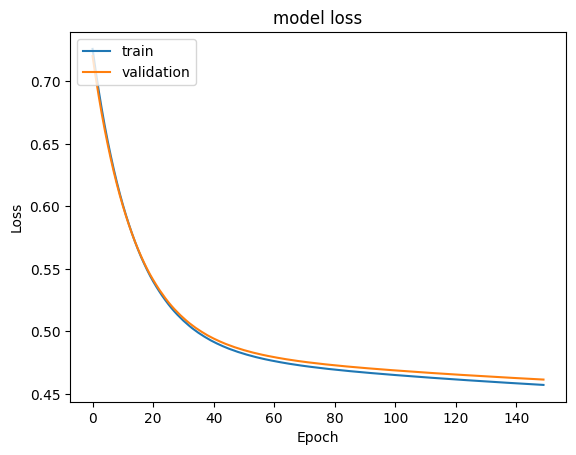

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

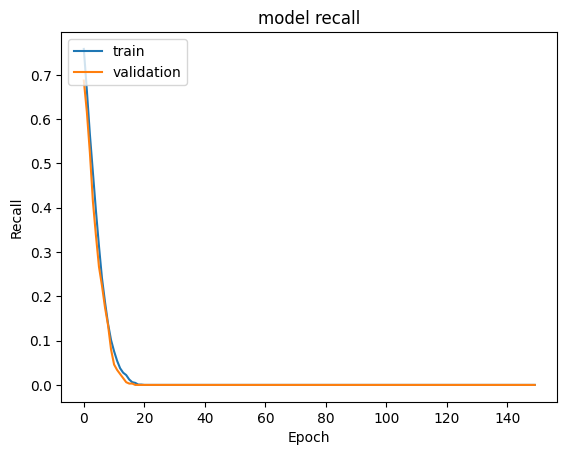

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall is 0. So not able to identify the exited customers

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold on the validation set
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Model not able to predict customers that exited

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5096
           1       0.00      0.00      0.00      1304

    accuracy                           0.80      6400
   macro avg       0.40      0.50      0.44      6400
weighted avg       0.63      0.80      0.71      6400



In [ ]:
#classification report
## Checking the model's performance on the validation set
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1274
           1       0.00      0.00      0.00       326

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.63      0.80      0.71      1600



For Class 0, the recall is 1.00, meaning the model correctly identifies all actual instances of class 0. This indicates that the model is very good at detecting class 0.
For Class 1, the recall is extremely low at 0.00, meaning the model fails to detect most of the actual instances of class 1. Only 1% of the actual class 1 instances are identified, which indicates a significant issue in detecting this class.

**Confusion matrix**

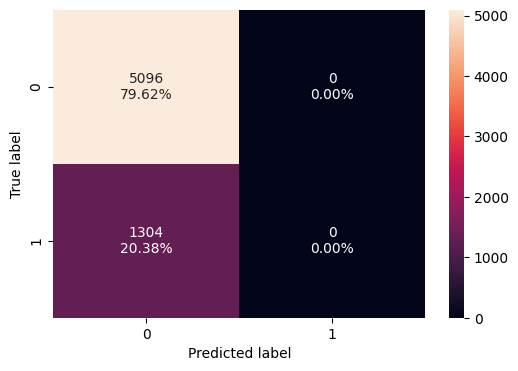

In [ ]:
## Checking the model's performance on the train set
make_confusion_matrix(y_train, y_train_pred)

The model not able to predict customers that exited.

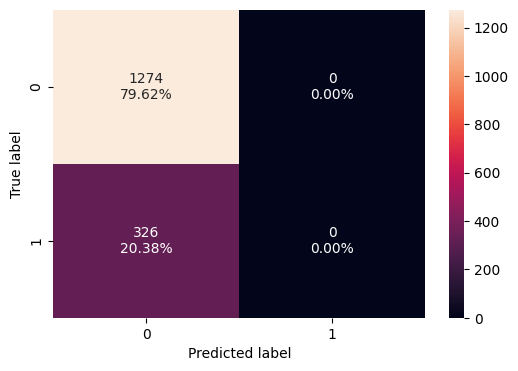

In [ ]:
## Checking the model's performance on the validation set
make_confusion_matrix(y_val, y_val_pred)

The model not able to predict customers that exited.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

We will use Recall as a performance evalaution metric

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=350,
    validation_data=(X_val,y_val),
    epochs=150,
    verbose=1
)

Epoch 1/150
19/19 [==============================] - 1s 16ms/step - loss: 0.5499 - recall: 0.0215 - val_loss: 0.4925 - val_recall: 0.0000e+00
Epoch 2/150
19/19 [==============================] - 0s 5ms/step - loss: 0.4704 - recall: 0.0023 - val_loss: 0.4564 - val_recall: 0.0153
Epoch 3/150
19/19 [==============================] - 0s 6ms/step - loss: 0.4400 - recall: 0.0698 - val_loss: 0.4393 - val_recall: 0.1074
Epoch 4/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4269 - recall: 0.1733 - val_loss: 0.4337 - val_recall: 0.1595
Epoch 5/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4197 - recall: 0.2308 - val_loss: 0.4295 - val_recall: 0.1871
Epoch 6/150
19/19 [==============================] - 0s 7ms/step - loss: 0.4138 - recall: 0.2308 - val_loss: 0.4250 - val_recall: 0.2239
Epoch 7/150
19/19 [==============================] - 0s 9ms/step - loss: 0.4095 - recall: 0.2738 - val_loss: 0.4228 - val_recall: 0.2117
Epoch 8/150
19/19 [=================

**Loss function**

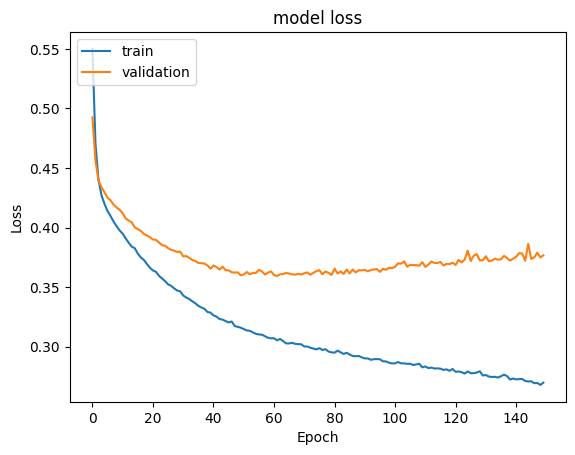

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

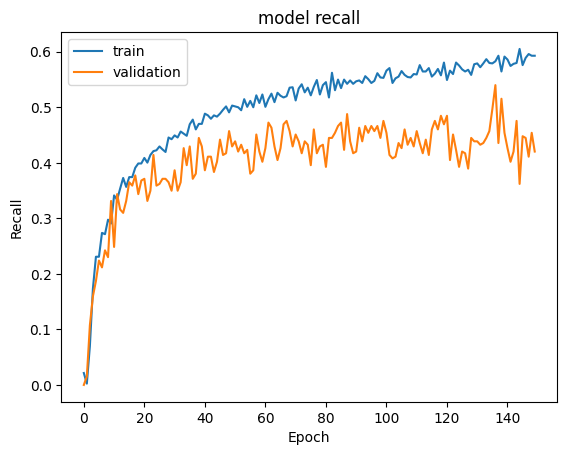

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#Classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5096
           1       0.83      0.56      0.67      1304

    accuracy                           0.89      6400
   macro avg       0.87      0.77      0.80      6400
weighted avg       0.88      0.89      0.88      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.71      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.79      0.69      0.72      1600
weighted avg       0.83      0.85      0.83      1600



The model performs very well on class 0 with high precision, recall, and F1-score. The performance on class 1 which if customers who exited is moderate, with lower recall indicating that the model misses a significant number of class 1 instances. The model is strong in predicting the majority class (class 0), its performance on the minority class (class 1) needs improvement. This could be due to data imbalance.

**Confusion matrix**

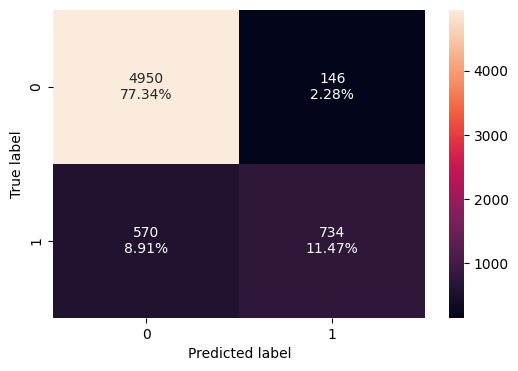

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

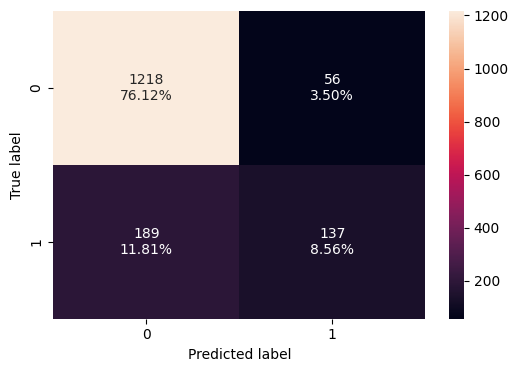

In [ ]:
#Calculating the confusion matrix on validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# Code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train, y_train,
    batch_size = 200,
    epochs = 150,
    verbose = 1,
    validation_data =( X_val, y_val)
)

Epoch 1/150
32/32 [==============================] - 2s 11ms/step - loss: 0.6589 - recall: 0.3382 - val_loss: 0.5464 - val_recall: 0.0000e+00
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 0.5078 - recall: 0.0023 - val_loss: 0.4808 - val_recall: 0.0000e+00
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.4767 - recall: 7.6687e-04 - val_loss: 0.4668 - val_recall: 0.0000e+00
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 0.4649 - recall: 0.0000e+00 - val_loss: 0.4559 - val_recall: 0.0000e+00
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.4552 - recall: 7.6687e-04 - val_loss: 0.4478 - val_recall: 0.0000e+00
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.4485 - recall: 0.0069 - val_loss: 0.4422 - val_recall: 0.0061
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.4440 - recall: 0.0376 - val_loss: 0.4379 - val_recall: 0.0583
Epoch 8/

**Loss function**

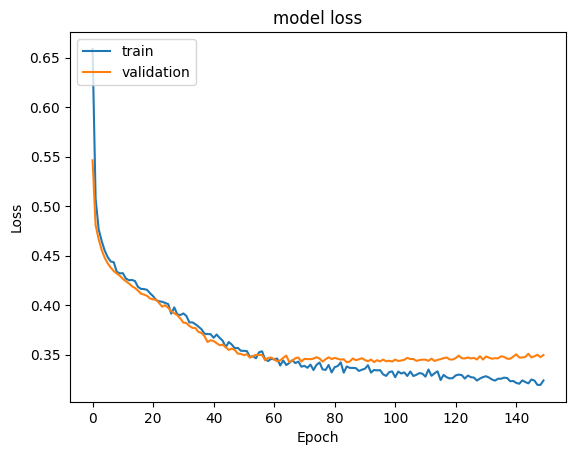

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that both the train and validation data curves are not smooth.

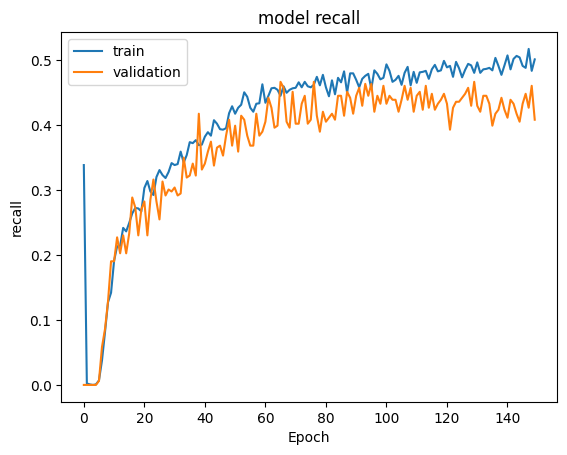

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5096
           1       0.84      0.49      0.62      1304

    accuracy                           0.88      6400
   macro avg       0.86      0.73      0.77      6400
weighted avg       0.87      0.88      0.86      6400



In [ ]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1274
           1       0.79      0.41      0.54       326

    accuracy                           0.86      1600
   macro avg       0.83      0.69      0.73      1600
weighted avg       0.85      0.86      0.84      1600



For class 0 (did not exit) Recall is 0.97 which indicates that out of all the actual instances of class 0, the model correctly identified 97% of them. The model performs very well on class 0 with high precision, recall, and F1-score.
For class 1 (exited) Recallis 0.41. This indicates that out of all the actual instances of class 1, the model correctly identified only 41% of them. The performance on class 1 is moderate, with lower recall indicating that the model misses a significant number of class 1 instances. The accuracy of the model is relatively high at 86%, indicating good overall performance.

**Confusion matrix**

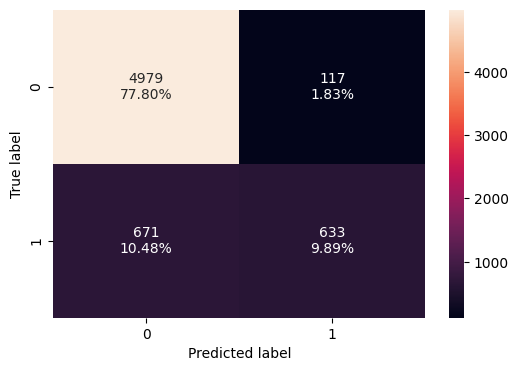

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

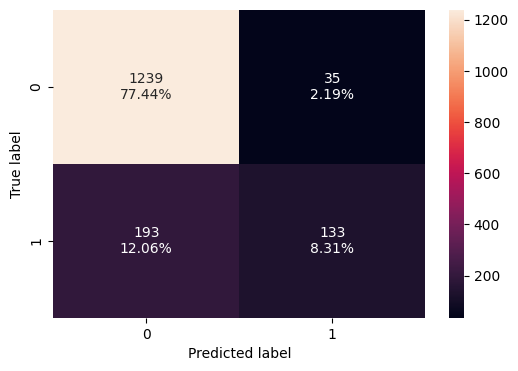

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

The model performs well for class 0 but poorly for class 1.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=350,
    epochs=150,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/150
30/30 [==============================] - 2s 31ms/step - loss: 0.7048 - recall: 0.9421 - val_loss: 0.7441 - val_recall: 0.9356
Epoch 2/150
30/30 [==============================] - 0s 5ms/step - loss: 0.7044 - recall: 0.9409 - val_loss: 0.7428 - val_recall: 0.9356
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 0.7040 - recall: 0.9403 - val_loss: 0.7414 - val_recall: 0.9387
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: 0.7035 - recall: 0.9398 - val_loss: 0.7401 - val_recall: 0.9387
Epoch 5/150
30/30 [==============================] - 0s 4ms/step - loss: 0.7032 - recall: 0.9384 - val_loss: 0.7390 - val_recall: 0.9387
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.7028 - recall: 0.9376 - val_loss: 0.7378 - val_recall: 0.9387
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 0.7024 - recall: 0.9370 - val_loss: 0.7366 - val_recall: 0.9356
Epoch 8/150
30/30 [=====================

**Loss function**

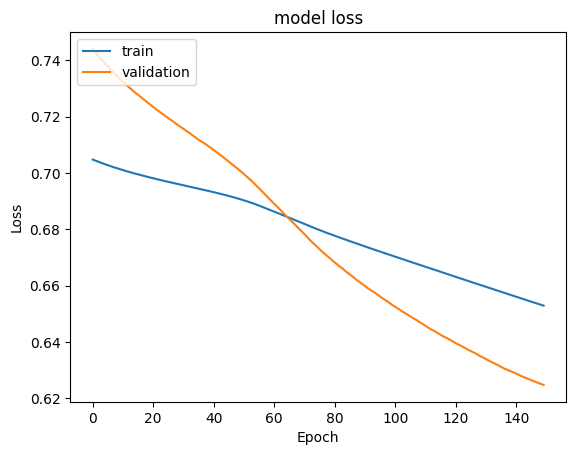

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

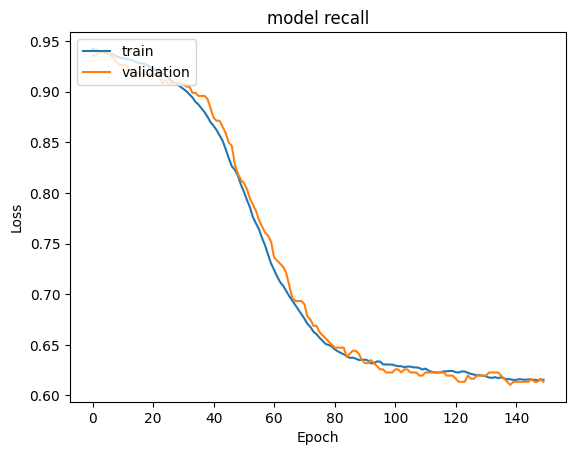

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      5096
           1       0.64      0.62      0.63      5096

    accuracy                           0.64     10192
   macro avg       0.64      0.64      0.64     10192
weighted avg       0.64      0.64      0.64     10192



In [ ]:
 ## Code to check the model's performance on the validation set
 cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1274
           1       0.31      0.61      0.41       326

    accuracy                           0.64      1600
   macro avg       0.59      0.63      0.57      1600
weighted avg       0.75      0.64      0.67      1600



There is average recall 0.63 (63%) across both classes.
Recall of 0.65 indicates that out of all the actual instances of class 0, the model correctly identified 65% of them.
Recall of 0.61 indicates that out of all the actual instances of class 1, the model correctly identified 61% of them.
The model performs moderately well on class 0 with high precision but lower recall, indicating that while the predictions for class 0 are often correct, many actual class 0 instances are missed.
The performance on class 1 is relatively poor, with low precision but moderate recall, suggesting that the model correctly identifies a fair number of class 1 instances but also makes many incorrect predictions.



**Confusion matrix**

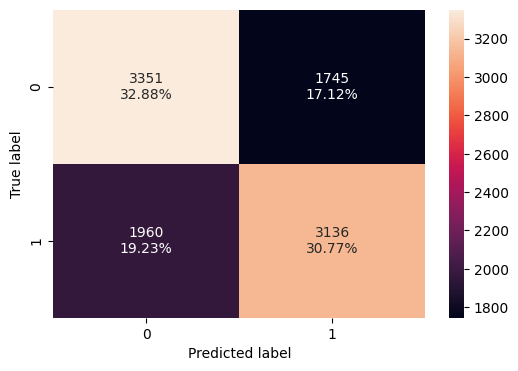

In [ ]:
#Calculating the confusion matrix on train set
make_confusion_matrix(y_train_smote, y_train_pred)

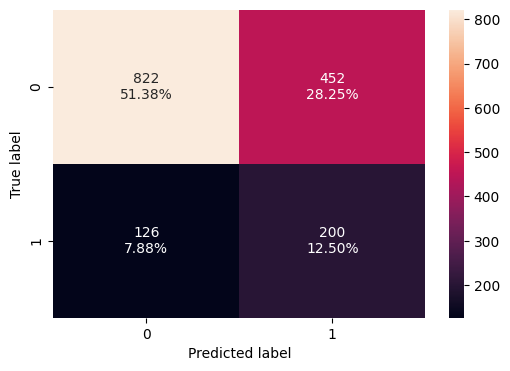

In [ ]:
#Calculating the confusion matrix
## Code to check the model's performance on the validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu'))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu'))
# Code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5025 (19.63 KB)
Trainable params: 5025 (19.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5025 (19.63 KB)
Trainable params: 5025 (19.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=350,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
30/30 [==============================] - 2s 16ms/step - loss: 0.6529 - recall: 0.6058 - val_loss: 0.5980 - val_recall: 0.6411
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 0.5660 - recall: 0.6998 - val_loss: 0.5611 - val_recall: 0.6472
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5342 - recall: 0.7318 - val_loss: 0.5019 - val_recall: 0.5890
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.5155 - recall: 0.7308 - val_loss: 0.5549 - val_recall: 0.6779
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4970 - recall: 0.7563 - val_loss: 0.5286 - val_recall: 0.6748
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4774 - recall: 0.7631 - val_loss: 0.5020 - val_recall: 0.6810
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4614 - recall: 0.7757 - val_loss: 0.4682 - val_recall: 0.6656
Epoch 8/100
30/30 [=====================

**Loss function**

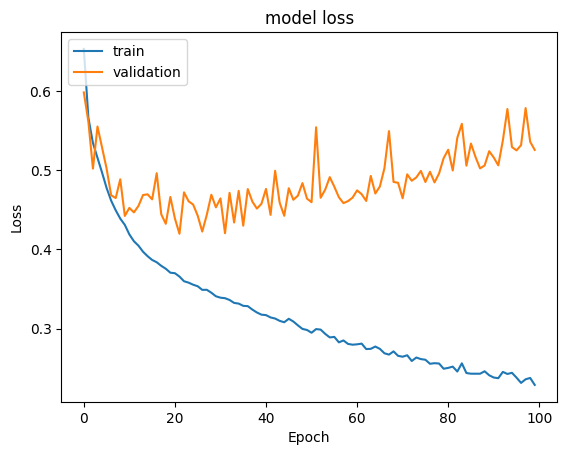

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

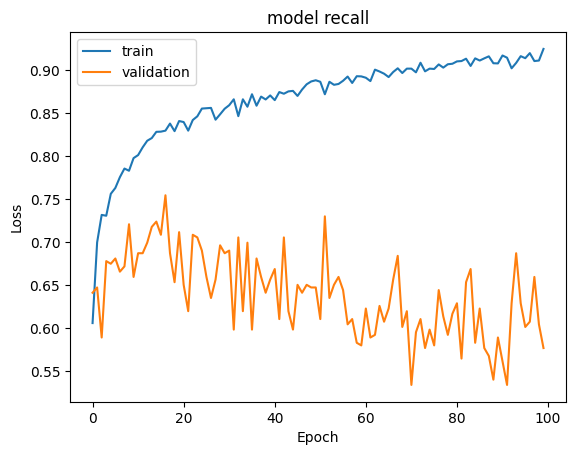

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5096
           1       0.91      0.92      0.92      5096

    accuracy                           0.92     10192
   macro avg       0.92      0.92      0.92     10192
weighted avg       0.92      0.92      0.92     10192



In [ ]:
cr=classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1274
           1       0.49      0.58      0.53       326

    accuracy                           0.79      1600
   macro avg       0.69      0.71      0.70      1600
weighted avg       0.81      0.79      0.80      1600



Recall of 0.85 indicates that out of all the actual instances of class 0, the model correctly identified 85% of them. Recall of 0.58 indicates that out of all the actual instances of class 1, the model correctly identified 58% of them.The model performs well on class 0 with high precision, recall and F1-score. The performance on class 1 is moderate, with lower precision but better recall, indicating that the model correctly identifies a fair number of class 1 instances but also makes a substantial number of false positives. In summary, the model shows strong performance on the majority class (class 0) but moderate performance on the minority class (class 1). The high precision and recall for class 0 indicate that the model is good at predicting and identifying class 0 instances. However, for class 1, while recall is relatively better, the low precision suggests that the model makes a significant number of incorrect predictions for class 1.

**Confusion matrix**

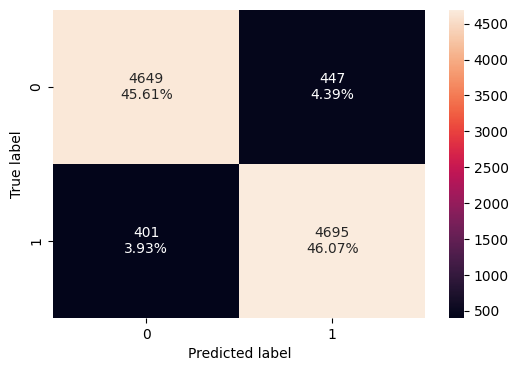

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

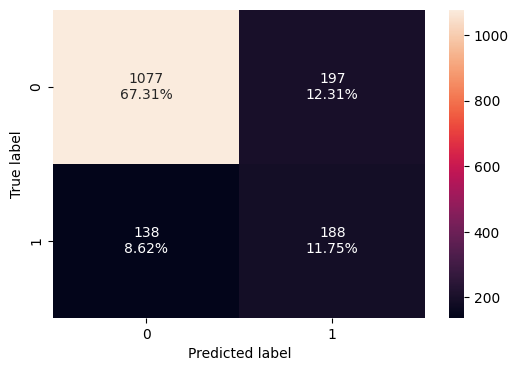

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

The model shows strong performance on the majority class (class 0) but moderate performance on the minority class (class 1).

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Code to add dropout rate
model_5.add(Dropout(0.2))
# Code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
# Code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=350, ## Complete the code to specify the batch size to use
    epochs=150, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/150
30/30 [==============================] - 2s 17ms/step - loss: 0.6730 - recall: 0.7178 - val_loss: 0.6403 - val_recall: 0.6626
Epoch 2/150
30/30 [==============================] - 0s 6ms/step - loss: 0.6116 - recall: 0.6693 - val_loss: 0.5538 - val_recall: 0.6074
Epoch 3/150
30/30 [==============================] - 0s 6ms/step - loss: 0.5771 - recall: 0.6803 - val_loss: 0.5192 - val_recall: 0.5767
Epoch 4/150
30/30 [==============================] - 0s 6ms/step - loss: 0.5622 - recall: 0.6876 - val_loss: 0.5288 - val_recall: 0.6350
Epoch 5/150
30/30 [==============================] - 0s 6ms/step - loss: 0.5528 - recall: 0.7190 - val_loss: 0.5433 - val_recall: 0.6564
Epoch 6/150
30/30 [==============================] - 0s 5ms/step - loss: 0.5431 - recall: 0.7190 - val_loss: 0.5283 - val_recall: 0.6288
Epoch 7/150
30/30 [==============================] - 0s 6ms/step - loss: 0.5381 - recall: 0.7282 - val_loss: 0.5380 - val_recall: 0.6442
Epoch 8/150
30/30 [=====================

**Loss function**

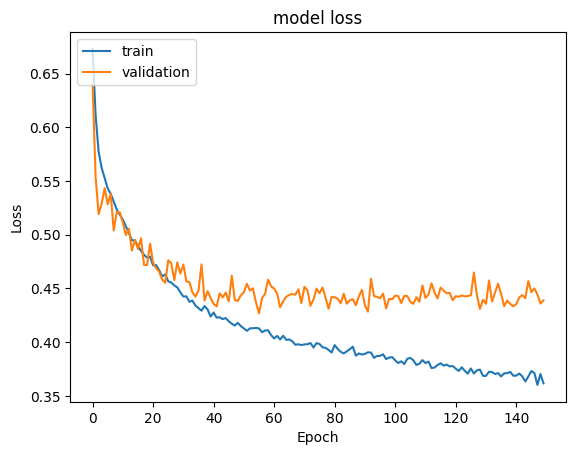

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

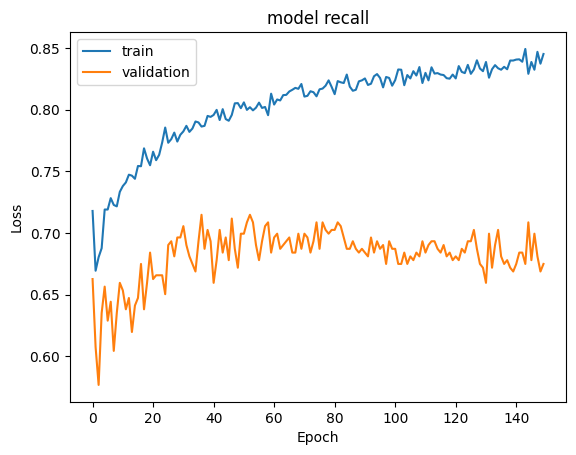

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5096
           1       0.86      0.87      0.86      5096

    accuracy                           0.86     10192
   macro avg       0.86      0.86      0.86     10192
weighted avg       0.86      0.86      0.86     10192



In [ ]:
#classification report to check the model's performance on the validation set
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1274
           1       0.51      0.67      0.58       326

    accuracy                           0.80      1600
   macro avg       0.71      0.75      0.73      1600
weighted avg       0.83      0.80      0.81      1600



Recall of 0.83 indicates that out of all the actual instances of class 0, the model correctly identified 83% of them. Recall of 0.67 indicates that out of all the actual instances of class 1, the model correctly identified 67% of them.he model performs very well on class 0 with high precision, recall, and F1-score. The model performs very well on class 0 with high precision, recall, and F1-score. The performance on class 1 is moderate, with lower precision but better recall, indicating that the model correctly identifies a fair number of class 1 instances but also makes a substantial number of false positives.

In summary, the model shows strong performance on the majority class (class 0) but moderate performance on the minority class (class 1). The high precision and recall for class 0 indicate that the model is good at predicting and identifying class 0 instances. For class 1, while recall is relatively better, the low precision suggests that the model makes a significant number of incorrect predictions for class 1.

**Confusion matrix**

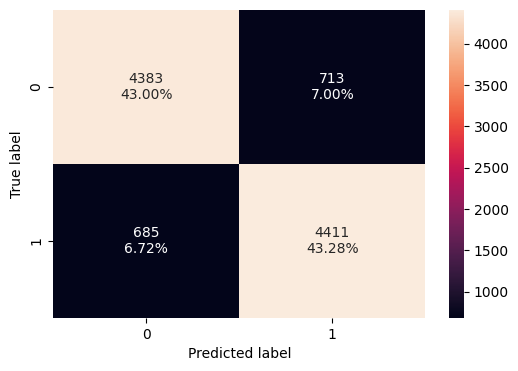

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

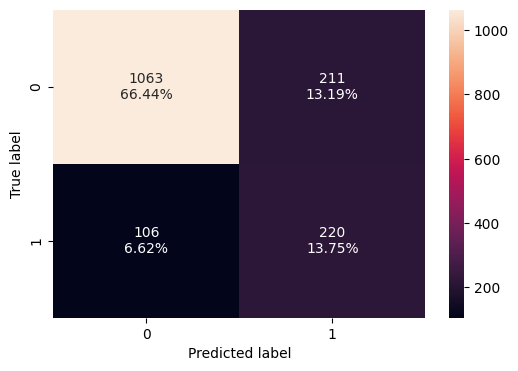

In [ ]:
#Calculating the confusion matrix to check the model's performance on the validation set
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


recall
NN with SGD                   0.000000
NN with Adam                  0.562883
NN with Adam & Dropout        0.485429
NN with SMOTE & SGD           0.615385
NN with SMOTE & Adam          0.921311
NN with SMOTE,Adam & Dropout  0.865581

NN with SGD (Stochastic Gradient Descent):

Recall is 0.000000. This indicates that the model with SGD did not correctly identify any positive instances. This could be due to various reasons such as improper convergence, inadequate training, or inappropriate learning rate.

NN with Adam: The Recall is 0.562883. This model has a recall of approximately 56.3%, meaning it correctly identified 56.3% of the actual positive instances. The Adam optimizer typically performs better than SGD due to its adaptive learning rate mechanism.
NN with Adam & Dropout:

NN with Adam with dropout: Recall is 0.485429. Introducing dropout (a regularization technique to prevent overfitting) with Adam resulted in a recall of about 48.5%. This suggests a slight decrease in recall compared to using Adam alone, possibly due to the model's increased robustness but at the cost of missing some positive instances.
NN with SMOTE & SGD:

SMOTE with SGD: The Recall was 0.615385. Applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and using SGD improved the recall to approximately 61.5%. SMOTE helps in balancing the dataset, allowing the model to learn better representations for the minority class.

NN with SMOTE & Adam: Recall was 0.921311. Combining SMOTE with the Adam optimizer yielded a high recall of about 92.1%, indicating excellent performance in identifying positive instances. This combination leverages both balanced data and an effective optimization technique.

NN with SMOTE, Adam & Dropout: The Recall was 0.865581. Adding dropout to the SMOTE and Adam combination resulted in a recall of approximately 86.6%. While slightly lower than using SMOTE and Adam alone, this still represents a strong performance, suggesting a trade-off between recall and model robustness.


Summary
SGD alone performs very poorly, with a recall of 0, indicating significant issues with the model's training.
Adam significantly improves recall to around 56.3%, showing its effectiveness over SGD.
Dropout combined with Adam slightly decreases recall, suggesting potential underfitting due to regularization.
SMOTE with SGD boosts recall to 61.5%, demonstrating the importance of addressing class imbalance.
SMOTE with Adam achieves the highest recall at 92.1%, highlighting the powerful combination of balanced data and an adaptive optimizer.
SMOTE, Adam, and Dropout together maintain high recall at 86.6%, indicating a good balance between high recall and model robustness against overfitting.

In conclusion, the best recall performance is achieved by combining SMOTE and Adam, with or without dropout depending on the need to prevent overfitting while maintaining high recall.

In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


recall
NN with SGD                   0.000000
NN with Adam                  0.420245
NN with Adam & Dropout        0.407975
NN with SMOTE & SGD           0.613497
NN with SMOTE & Adam          0.576687
NN with SMOTE,Adam & Dropout  0.674847

NN with SGD: Training Recall is 0.000000 and validation Recallis 0.000000. Both training and validation recall are 0, indicating that the model with SGD fails to identify any positive instances, suggesting a fundamental issue with the training process.

NN with Adam: Training Recall is 0.562883 and validation Recall is 0.420245. Recall decreases from approximately 56.3% in training to about 42% in validation. This drop indicates overfitting, where the model performs well on training data but less effectively on unseen validation data.

NN with Adam & Dropout: Training Recall is 0.485429 and validation Recall is 0.407975. Recall decreases from approximately 48.5% in training to about 40.8% in validation. The decrease is smaller than with Adam alone, suggesting dropout helps mitigate overfitting but still needs improvement for better generalization.


NN with SMOTE & SGD: Training recall is 0.615385 and validation Recall is 0.613497. Recall is nearly consistent between training (61.5%) and validation (61.3%), indicating good generalization and that the model benefits significantly from SMOTE when using SGD.


NN with SMOTE & Adam: Training Recall is 0.921311 and validation Recall is 0.576687. Recall decreases from approximately 92.1% in training to about 57.7% in validation, showing a significant drop. This suggests overfitting where the model performs exceptionally well on the training data but struggles to generalize to the validation data.


NN with SMOTE, Adam & Dropout: Training Recall is 0.865581 and validation Recall is 0.674847. The recall decreases from approximately 86.6% in training to about 67.5% in validation. This combination still shows some overfitting but performs better than SMOTE & Adam alone, indicating that dropout helps in improving generalization.

Summary of Training vs. Validation Performance

NN with SGD: Performs poorly on both training and validation sets, suggesting fundamental issues with model convergence.

NN with Adam: Shows overfitting with a significant drop in recall from training to validation.

NN with Adam & Dropout: Shows less overfitting than Adam alone but still has room for improvement.

NN with SMOTE & SGD: Generalizes well with consistent recall between training and validation, indicating the positive impact of SMOTE.

NN with SMOTE & Adam: Shows significant overfitting with a large drop in recall, indicating that the model might be too complex or requires better regularization.

NN with SMOTE, Adam & Dropout: Shows a reduced drop in recall compared to SMOTE & Adam, indicating that dropout helps mitigate overfitting and improves generalization.

Conclusion

The SMOTE amd SGD combination shows the best generalization, with minimal drop in recall between training and validation sets.
The SMOTE, Adam & Dropout combination, while still overfitting, shows better generalization than SMOTE & Adam, suggesting that dropout helps to balance the trade-off between model complexity and overfitting.
Regularization techniques like dropout and oversampling methods like SMOTE can significantly impact model performance and generalization.
Improving validation performance further may involve experimenting with other regularization methods, tuning hyperparameters, or using cross-validation to ensure the model generalizes well to unseen data.

In [ ]:
train_metric_df - valid_metric_df

recall
NN with SGD                   0.000000
NN with Adam                  0.142638
NN with Adam & Dropout        0.077454
NN with SMOTE & SGD           0.001888
NN with SMOTE & Adam          0.344624
NN with SMOTE,Adam & Dropout  0.190734

In [ ]:
## Code to specify the best model
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 5ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


The highest recall value is observed with the NN with SMOTE, Adam & Dropout model, with a recall of approximately 0.674847. Therefore, based on the provided recall values, the NN with SMOTE, Adam & Dropout model appears to be the best-performing model for this dataset in terms of recall on the validation set.








In [ ]:
#let's print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



Recall of 0.83 indicates that out of all the actual instances of class 0, the model correctly identified 83% of them. Recall of 0.70 implies that out of all the actual instances of class 1, the model correctly identified 70% of them. Recall of 0.76 is the average recall across both classes, treating each class equally.
The model performs very well on class 0 with high precision (0.92), recall (0.83) and F1-score (0.87) while the performance on class 1 is moderate, with lower precision (0.51) but better recall (0.70). This indicates the model identifies a fair number of class 1 instances but also makes a substantial number of false positives.
Overall the model has a good overall accuracy of 80%, indicating it correctly classifies a significant proportion of instances.

In conclusion: The model is well-tuned for class 0 but has room for improvement in identifying class 1 instances.
The high precision for class 0 indicates that predictions for class 0 are often correct, while the lower precision for class 1 suggests a higher rate of false positives.
The recall for class 1 is relatively higher, meaning the model captures more true positives for class 1 but at the cost of precision.



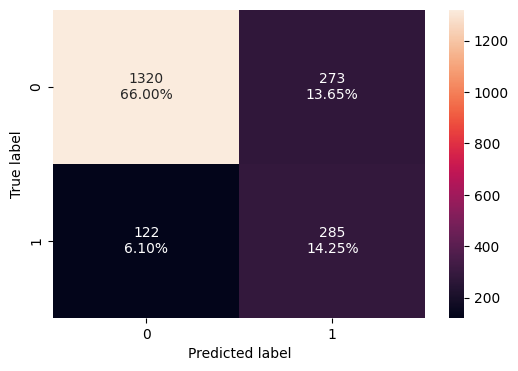

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

# Insights

Class imbalance impact: The dataset exhibits class imbalance, with significantly more instances of class 0 (majority class) than class 1 (minority class). In fact, The number of instances of class 0 (1593) is much higher than that of class 1 (407). This imbalance affects the model's performance metrics, particularly for class 1.

Model performance: The model performs very well on class 0, with high precision, recall, and F1-score. Class 1 Performance: The model struggles with class 1, as indicated by lower precision, recall, and F1-score. This suggests that the model might be biased towards predicting class 0. Improvement Areas: Addressing Imbalance: Techniques such as oversampling the minority class (class 1), undersampling the majority class (class 0), or using more sophisticated methods like SMOTE could help improve the performance on class 1.

Precision-Recall trade-off: The precision-recall trade-off is evident, particularly for class 1. While the precision for class 1 is moderate at 0.51, indicating that when the model predicts a positive outcome, it's correct approximately 51% of the time, the recall is relatively higher at 0.70. This suggests that the model is better at capturing true positive instances of class 1 but may also result in more false positives.

Accuracy: The overall accuracy of the model is 80%, meaning that 80% of the instances in the dataset are correctly classified by the model. However, accuracy alone may not provide a complete picture of model performance, especially in the presence of class imbalance.
Business Implications:

Identifying Potential Opportunities: The model's ability to correctly identify instances of class 1 (e.g., detecting anomalies, identifying potential customers likely to churn, etc.) could present opportunities for targeted interventions or marketing strategies.

Risk of False Positives: Given the moderate precision for class 1, there's a risk of false positives, where the model incorrectly predicts an instance as belonging to class 1. Depending on the context (e.g., fraud detection, medical diagnosis), false positives may have significant implications and should be carefully managed.

Importance of Recall: The relatively higher recall for class 1 indicates that the model is better at capturing instances of class 1 when they occur. In scenarios where it's crucial not to miss positive instances (e.g., identifying rare but critical events), prioritizing recall over precision may be beneficial.

The model can be improvement by application of varius strategies including;

Addressing class imbalance: Techniques such as oversampling (e.g., SMOTE) or adjusting class weights during training can help improve model performance, especially for minority classes. Therefore, techniques such as oversampling the minority class (class 1), undersampling the majority class (class 0), or using more sophisticated methods like SMOTE could help improve the performance on class 1.

Model tuning: Further tuning the model's hyperparameters or exploring different models/algorithms might improve the balance between precision and recall for class 1. Experimenting with different algorithms, hyperparameter tuning, or feature engineering could further enhance model performance, particularly in improving precision for class 1 while maintaining a high recall.

Feature engineering: Investigating additional features or improving the quality of existing features might also help the model better differentiate between classes.

Continuous monitoring and evaluation: As business conditions evolve or new data becomes available, it's essential to continuously monitor the model's performance and reevaluate its effectiveness. Regular model retraining and validation can ensure that the model remains accurate and relevant over time.

By understanding the nuances of the model's performance metrics and their implications for business objectives, stakeholders can make informed decisions about deploying the model and designing appropriate strategies to leverage its insights effectively.




# Business recommendations

Utility of predictions for targeted interventions: The ban should use the model predictions, particularly for class 1 instances, to target specific interventions or marketing strategies. For example, identify customers at high risk of churn and offer personalized retention offers or incentives to prevent churn.


Implement Risk Mitigation Strategies: The bank should develop strategies to mitigate the risk of false positives, especially in critical areas such as fraud detection or medical diagnosis. This could involve implementing additional verification steps or human review processes to confirm positive predictions before taking action.


Focus on improving precision: The bank should invest in strategies to improve precision for class 1 predictions while maintaining a high recall. This could include refining the model through algorithm selection, feature engineering or hyperparameter tuning to better differentiate between true positives and false positives.


Address class imbalance: The bank should implement techniques such as oversampling (e.g., SMOTE) or adjusting class weights during model training to address the imbalance between classes. This can help improve the model's ability to learn from minority class instances and make more accurate predictions.


Regular monitoring and evaluation: The bank can consider the establishment of a process for regularly monitoring the model's performance and evaluating its effectiveness in achieving business objectives. This includes tracking key performance metrics, conducting regular model audits, and retraining the model as needed with new data or updated business requirements.


Cross-functional collaboration: The bank should foster collaboration between data science teams, business stakeholders and domain experts to ensure that the model's predictions align with business goals and operational requirements. Incorporate feedback from end-users to continuously improve the model and tailor it to specific business needs.
Ethical Considerations:

The bank should ensure that the deployment and use of the model adhere to ethical guidelines and regulatory requirements, particularly in sensitive areas such as privacy, fairness and transparency. Implement measures to mitigate biases and ensure fairness in model predictions across different demographic groups.

Investment in user education and training: The bank should provide training and education to end-users on how to interpret and act upon the model predictions effectively. This includes understanding the model's limitations, interpreting prediction probabilities, and integrating model insights into decision-making processes.


By implementing these recommendations, the bank can maximize the value derived from the predictive model, drive informed decision-making and achieve its business objectives more effectively while reducing churn.
